In [1]:
%%capture
!pip install sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

%matplotlib inline
import re

## About the Data

This is the data that confirmed the grade of performance with age and some exercise performance data.

- `age` : The age of the individual, ranging from 20 to 64 years.
- `gender` : The gender of the individual, represented by 'F' (Female) and 'M' (Male).
- `height_cm` : The height of the individual in centimeters. (To convert to feet, divide by 30.48).
- `weight_kg` : The weight of the individual in kilograms.
- `body_fat_perc` : The body fat percentage of the individual.
- `diastolic` : The diastolic blood pressure (minimum) of the individual, measured in mmHg.
- `systolic` : The systolic blood pressure (minimum) of the individual, measured in mmHg.
- `grip_force` : The grip force of the individual, which likely represents the strength of their hand grip, measured in kilograms or newtons (specific units may vary).
- `sit_and_bend_forward_cm` : The distance the individual can reach while sitting and bending forward, measured in centimeters. This is often a measure of flexibility.
- `sit_ups_counts` : The count of sit-ups performed by the individual, indicating abdominal strength or endurance.
- `broad_jump_cm` : The distance covered in a broad jump by the individual, measured in centimeters, assessing lower body power.
- `class` : The fitness classification of the individual, with possible categories 'A', 'B', 'C', and 'D'. 'A' denotes the best performance, and the classes may be stratified based on fitness levels.

In [4]:
data = pd.read_csv("./data/bodyPerformance.csv")

In [5]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
# changing the column names
data = data.rename(columns = {'body fat_%' : 'body_fat_perc', 
                              'gripForce' : 'grip_force',
                              'sit and bend forward_cm' : 'sit_and_bend_forward_cm',
                              'sit-ups counts' : 'sit_ups_counts',
                              'broad jump_cm' : 'broad_jump_cm'})

In [7]:
# convert data types
num_cols = ['age', 'height_cm', 'weight_kg', 'body_fat_perc', 'diastolic',
           'systolic', 'grip_force', 'sit_and_bend_forward_cm', 'sit_ups_counts', 'broad_jump_cm']

for col in num_cols:
    data[col] = data[col].astype(float)

In [8]:
cat_col = data.select_dtypes(include='object').columns.tolist()

In [9]:
data.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body_fat_perc              0
diastolic                  0
systolic                   0
grip_force                 0
sit_and_bend_forward_cm    0
sit_ups_counts             0
broad_jump_cm              0
class                      0
dtype: int64

## Descriptive Statistics

`Purpose` : Summarizes the main features of the dataset into meaningful information that is easy to interpret and share in the form of graph.

### Measure of Central Tendancy

The `Measures of Central Tendency` are statistical values that represent the center or typical value within a dataset. These measures are useful for summarizing data into a single value that best describes the dataset's distribution.

#### Mean

Mean is the average of the values of the data. Represents the central value of the data.

- Useful for datasets with values that are evenly distributed, as it gives a balanced point around which data points are centered.

In [10]:
data[num_cols].mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body_fat_perc               23.240165
diastolic                   78.796842
systolic                   130.234817
grip_force                  36.963877
sit_and_bend_forward_cm     15.209268
sit_ups_counts              39.771224
broad_jump_cm              190.129627
dtype: float64

#### Geometric Mean

The nth root of the product of all values (where n is the count of values). Represents the central tendency for data that changes multiplicatively or is on a log scale.

- Useful for datasets where values are in terms of rates, ratios, or percentages (e.g., growth rates, returns on investment).

In [11]:
for col in num_cols:
    if col != "sit_and_bend_forward_cm":
        print(f"For the column : {col} the geometric mean is {stats.gmean(data[col])}")

For the column : age the geometric mean is 34.4243198961257
For the column : height_cm the geometric mean is 168.34732191180555
For the column : weight_kg the geometric mean is 66.39359290676381
For the column : body_fat_perc the geometric mean is 22.053450257160534
For the column : diastolic the geometric mean is 0.0
For the column : systolic the geometric mean is 0.0
For the column : grip_force the geometric mean is 0.0
For the column : sit_ups_counts the geometric mean is 0.0
For the column : broad_jump_cm the geometric mean is 0.0


#### Hormonic Mean

The reciprocal of the average of the reciprocals of each value. Emphasizes smaller values in the dataset, giving lower values more weight.

- Suitable for datasets involving rates or ratios, especially when values cannot simply be averaged due to their reciprocal relationship (e.g., average speed).

In [12]:
for col in num_cols:
    if col != "sit_and_bend_forward_cm":
        print(f"For the column : {col} the harmonic mean is {statistics.harmonic_mean(data[col])}")

For the column : age the harmonic mean is 32.35378623309816
For the column : height_cm the harmonic mean is 168.1329276755062
For the column : weight_kg the harmonic mean is 65.34058931672567
For the column : body_fat_perc the harmonic mean is 20.766092233445065
For the column : diastolic the harmonic mean is 0
For the column : systolic the harmonic mean is 0
For the column : grip_force the harmonic mean is 0
For the column : sit_ups_counts the harmonic mean is 0
For the column : broad_jump_cm the harmonic mean is 0


If the data is having 0 in it's values then `Geomteric Mean` and `Harmonic Mean` will also be 0 and if the data has negative values then `Geomteric Mean` will produce NaN and `Harmonic Mean` won't accept the values.

#### Mode

Mode is frequently occurring data or elements. If an element occurs the highest number of times, it is the mode of that data. If no number in the data is repeated, then there is no mode for that data.

In [13]:
data.mode()

,age,gender,height_cm,weight_kg,body_fat_perc,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


#### Median

Median is the 50th percentile of the data. It is exactly the center point of the data. Median represents the middle value for any group. It is the point at which half the data is more and half the data is less.

In [14]:
for col in num_cols:
    print(f"For the column : {col} the median is {statistics.median(data[col])}")

For the column : age the median is 32.0
For the column : height_cm the median is 169.2
For the column : weight_kg the median is 67.4
For the column : body_fat_perc the median is 22.8
For the column : diastolic the median is 79.0
For the column : systolic the median is 130.0
For the column : grip_force the median is 37.9
For the column : sit_and_bend_forward_cm the median is 16.2
For the column : sit_ups_counts the median is 41.0
For the column : broad_jump_cm the median is 193.0


### Measure of Variability/Dispersion

Describe the spread or distribution of data points in a dataset. They show how much individual data points differ from the central tendency and help in understanding the dataset’s overall shape and consistency.

#### Range

The difference between the maximum and minimum values in a dataset.

In [15]:
for col in num_cols:
    data_range = data[col].max() - data[col].min()
    print(f"Range for {col}:", data_range)

Range for age: 43.0
Range for height_cm: 68.80000000000001
Range for weight_kg: 111.8
Range for body_fat_perc: 75.4
Range for diastolic: 156.2
Range for systolic: 201.0
Range for grip_force: 70.5
Range for sit_and_bend_forward_cm: 238.0
Range for sit_ups_counts: 80.0
Range for broad_jump_cm: 303.0


#### Variance

The average of the squared differences from the mean. It quantifies how spread out the data points are around the mean.

In [16]:
for col in num_cols:
    print(f"Variance for {col}:", statistics.variance(data[col]))

Variance for age: 185.6580511106169
Variance for height_cm: 71.00729348140636
Variance for weight_kg: 142.79452570203424
Variance for body_fat_perc: 52.66178600041373
Variance for diastolic: 115.39127511955682
Variance for systolic: 216.50042823887298
Variance for grip_force: 112.88773559936443
Variance for sit_and_bend_forward_cm: 71.51538603861185
Variance for sit_ups_counts: 203.82411511666297
Variance for broad_jump_cm: 1589.4574345759268


#### Standard Deviation

The square root of the variance, bringing the measure back to the original units of the data.

In [17]:
for col in num_cols:
    print(f"Standard Deviation for {col}:", statistics.stdev(data[col]))

Standard Deviation for age: 13.625639475291312
Standard Deviation for height_cm: 8.426582550560243
Standard Deviation for weight_kg: 11.949666342707408
Standard Deviation for body_fat_perc: 7.256844079929906
Standard Deviation for diastolic: 10.742033099909758
Standard Deviation for systolic: 14.713953521704253
Standard Deviation for grip_force: 10.624864027335335
Standard Deviation for sit_and_bend_forward_cm: 8.456677009240204
Standard Deviation for sit_ups_counts: 14.276698326877366
Standard Deviation for broad_jump_cm: 39.86800013263679


#### Difference between Variance & Standard Deviation
- Variance is a method to find or obtain the measure between the variables that how are they different from one another, whereas standard deviation shows us how the data set or the variables differ from the mean or the average value from the data set.

- Variance helps to find the distribution of data in a population from a mean, and standard deviation also helps to know the distribution of data in population, but standard deviation gives more clarity about the deviation of data from a mean.

#### Interquartile Range (IQR)

The range of the middle 50% of data, calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

In [19]:
for col in num_cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 23.0
Interquartile Range (IQR): 12.400000000000006
Interquartile Range (IQR): 17.099999999999994
Interquartile Range (IQR): 10.0
Interquartile Range (IQR): 15.0
Interquartile Range (IQR): 21.0
Interquartile Range (IQR): 17.700000000000003
Interquartile Range (IQR): 9.799999999999999
Interquartile Range (IQR): 20.0
Interquartile Range (IQR): 59.0


#### Mean Absolute Deviation (MAD)

The average of the absolute deviations from the mean.

`Pros`: Intuitive and less sensitive to extreme values compared to variance.

`Cons`: Lacks the properties of variance for further statistical calculations but still useful for basic analysis.

In [20]:
for col in num_cols:
    mean = data[col].mean()
    MAD = np.mean(np.abs(data[col] - mean))
    print("Mean Absolute Deviation (MAD):", MAD)

Mean Absolute Deviation (MAD): 11.844361839537575
Mean Absolute Deviation (MAD): 6.9190838833894714
Mean Absolute Deviation (MAD): 9.680199448244139
Mean Absolute Deviation (MAD): 5.833441963092125
Mean Absolute Deviation (MAD): 8.651310090547964
Mean Absolute Deviation (MAD): 12.026423721292897
Mean Absolute Deviation (MAD): 9.068305808881497
Mean Absolute Deviation (MAD): 6.268510290340073
Mean Absolute Deviation (MAD): 11.571289445905933
Mean Absolute Deviation (MAD): 32.72609857046664


#### Co-efficient of Variance

The ratio of the standard deviation to the mean, usually expressed as a percentage.

`Pros`: Useful for comparing the relative variability between datasets with different units or vastly different means.

`Cons`: Only meaningful for data on a ratio scale with a meaningful zero; not useful for data with negative values.

In [22]:
for col in num_cols:
    CV = (np.std(data[col], ddof=1) / mean) * 10
    print("Coefficient of Variation (CV):", round(CV, 2), "%")

Coefficient of Variation (CV): 0.72 %
Coefficient of Variation (CV): 0.44 %
Coefficient of Variation (CV): 0.63 %
Coefficient of Variation (CV): 0.38 %
Coefficient of Variation (CV): 0.56 %
Coefficient of Variation (CV): 0.77 %
Coefficient of Variation (CV): 0.56 %
Coefficient of Variation (CV): 0.44 %
Coefficient of Variation (CV): 0.75 %
Coefficient of Variation (CV): 2.1 %


### Shape of the Data

Skewness is the measure of the asymmetry of the distribution of data.
The data is not symmetrical (i.e) it is skewed towards one side.

**Skewness is classified into two types.**

1. **Positively skewed:**

In a Positively skewed distribution, the data values are clustered around the left side of the distribution and the right side is longer.
The mean and median will be greater than the mode in the positive skew.

2. **Negatively skewed:**

In a Negatively skewed distribution, the data values are clustered around the right side of the distribution and the left side is longer.
The mean and median will be less than the mode.

In [23]:
data[num_cols].skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body_fat_perc              0.361132
diastolic                 -0.159637
systolic                  -0.048654
grip_force                 0.018456
sit_and_bend_forward_cm    0.785492
sit_ups_counts            -0.467830
broad_jump_cm             -0.422623
dtype: float64

<Axes: ylabel='Density'>

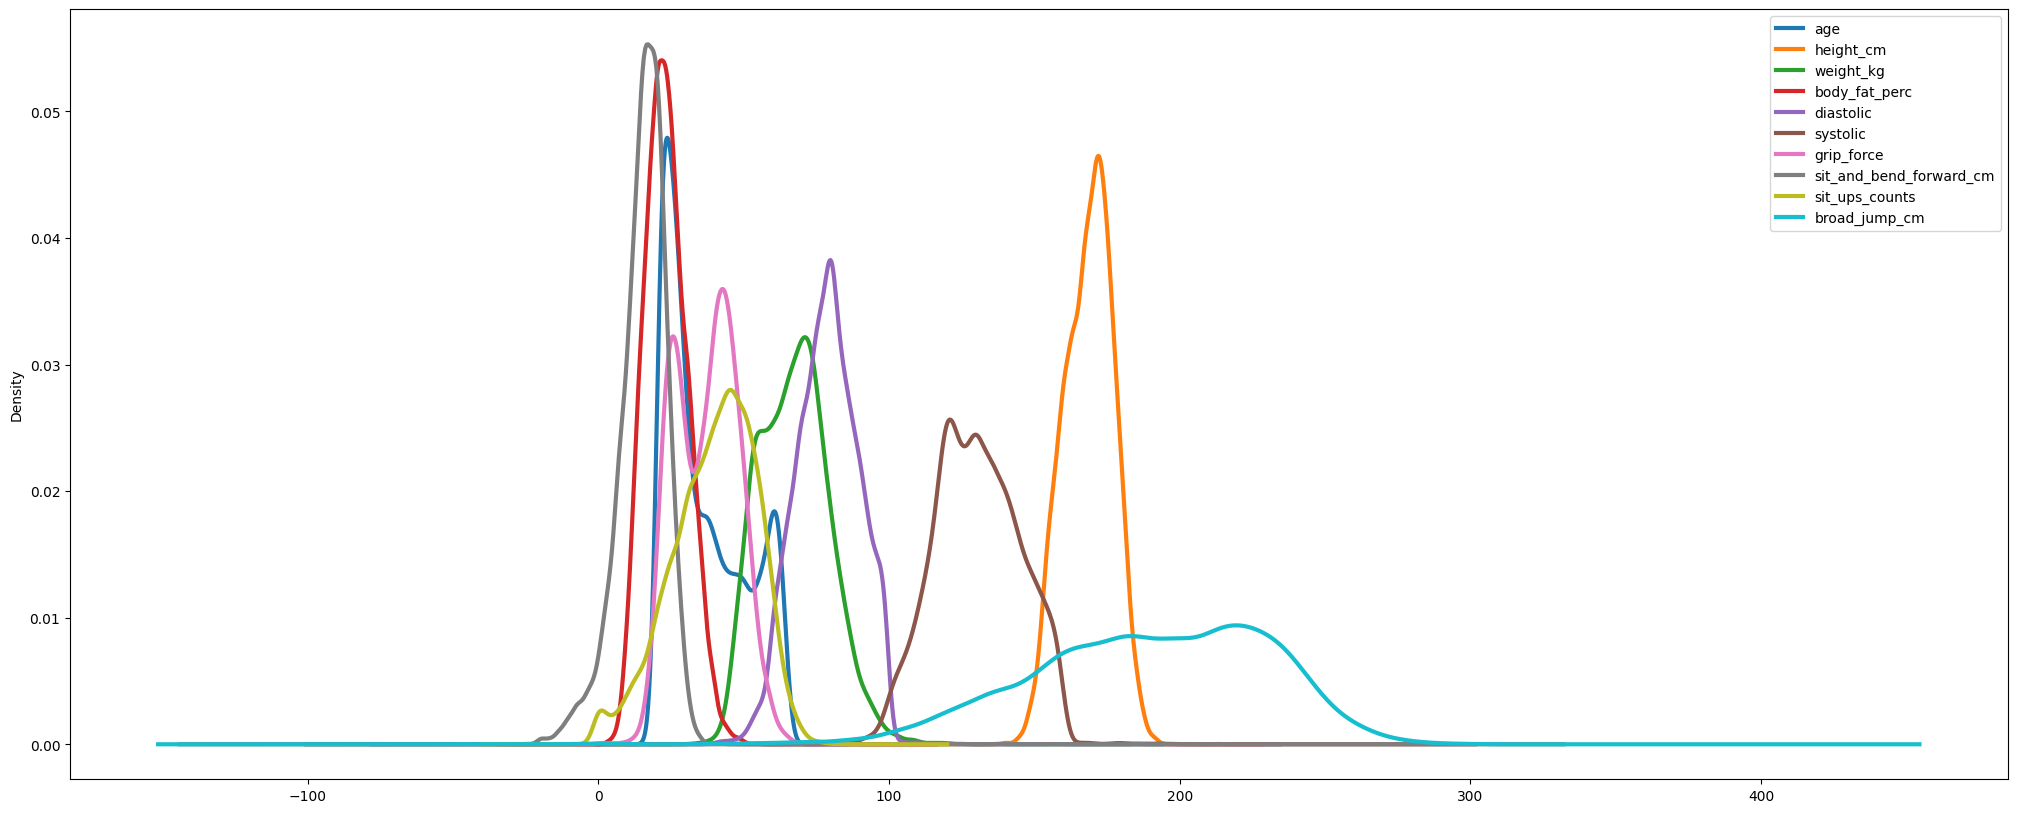

In [27]:
data.plot.density(figsize = (25, 10),linewidth = 3)

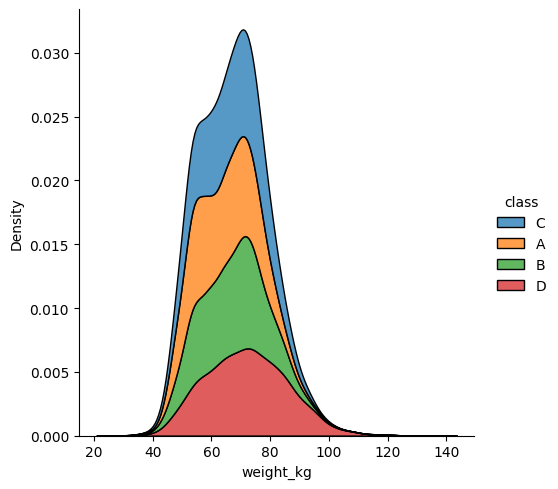

In [25]:
sns.displot(data, x="weight_kg", hue="class", kind="kde", multiple="stack")

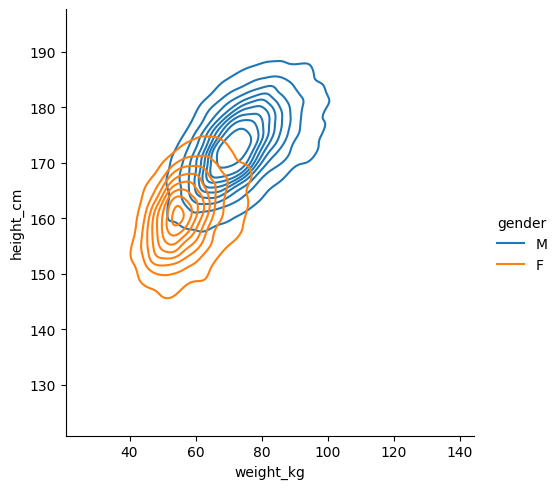

In [29]:
sns.displot(data, x="weight_kg", y="height_cm", hue="gender", kind="kde")

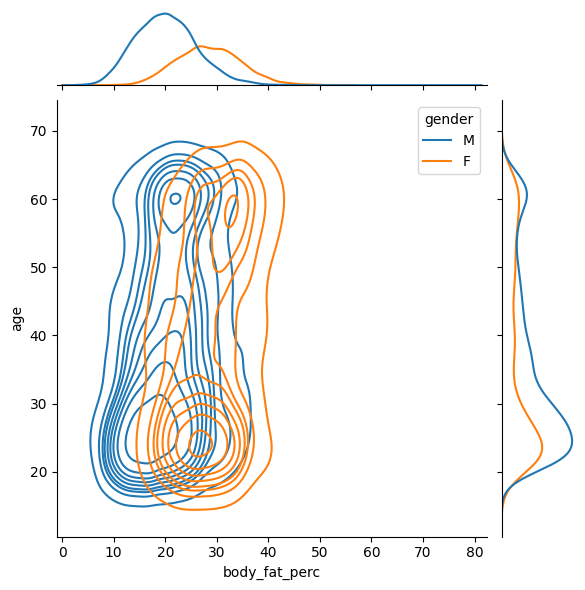

In [30]:
sns.jointplot(data, x="body_fat_perc", y="age", hue="gender",kind="kde")

#### Kurtosis
Kurtosis is the measure of describing the distribution of data.
This data is distributed in different ways.
1. **Platykurtic:** The platykurtic shows a distribution with flat tails. Here the data is distributed faltly . The flat tails indicated the small outliers in the distribution.

2. **Mesokurtic:** In Mesokurtic, the data is widely distributed. It is normally distributed and it also matches normal distribution.

3. **Leptokurtic:** In leptokurtic, the data is very closely distributed. The height of the peak is greater than width of the peak.

In [32]:
data[num_cols].kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body_fat_perc               0.128712
diastolic                   0.363525
systolic                    0.380285
grip_force                 -0.822200
sit_and_bend_forward_cm    35.220856
sit_ups_counts             -0.156326
broad_jump_cm               0.002397
dtype: float64

## Inferential Statistics

Offers methods to study experiments done on small samples of data and chalk out the inferences to the entire population (entire domain)

### Population Vs Samples:
In statistics, the population is a set of all elements or items that you’re interested in. Populations are often vast, which makes them inappropriate for collecting and analyzing data. That’s why statisticians usually try to make some conclusions about a population by choosing and examining a representative subset of that population.

This subset of a population is called a sample. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

### Data Sampling:
Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined.

**Probability Sampling:** In probability sampling, every element of the population has an equal chance of being selected. Probability sampling gives us the best chance to create a sample that is truly representative of the population
   - Simple Random
   - Systematic
   - Stratified
   - Cluster

**Non-Probability Sampling:** In non-probability sampling, all elements do not have an equal chance of being selected. Consequently, there is a significant risk of ending up with a non-representative sample which does not produce generalizable results
   - Convenience
   - Quota
   - Judgement
   - Snowball

### Central Limit Theorem

- The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.

- The sample means will converge to a normal distribution regardless of the shape of the population. That is, the population can be positively or negatively skewed, normal or non-normal.

- CLT states that — as the sample size tends to infinity, the shape of the distribution resembles a bell shape (normal distribution). The center of this distribution of the sample means becomes very close to the population mean — which is essentially the law of large numbers.


It enables us to test the hypothesis of whether our sample represents a population distinct from the known population. We can take a mean from a sample and compare it with the sampling distribution to estimate the probability whether the sample comes from the known population.

### Confidence Interval

Confidence Interval is a type of estimate computed from the statistics of the observed data which gives a range of values that’s likely to contain a population parameter with a particular level of confidence.

A confidence interval for the mean is a range of values between which the population mean possibly lies.